In [180]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [181]:
file=r'us-airlines-monthly-aircraft-miles-flown.csv'
df=pd.read_csv(file,parse_dates=[0])
df.head(5)

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [182]:
df.shape

(96, 2)

<Axes: >

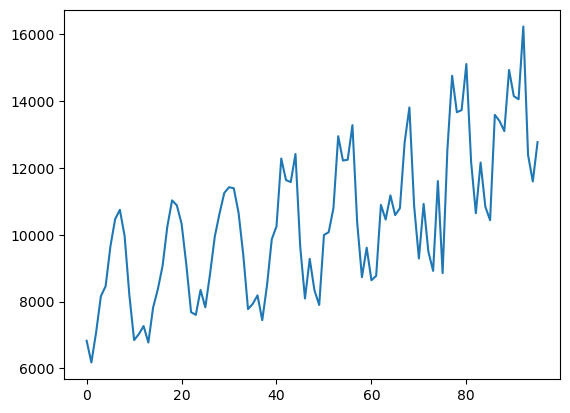

In [183]:
df["MilesMM"].plot()

<Axes: ylabel='MilesMM'>

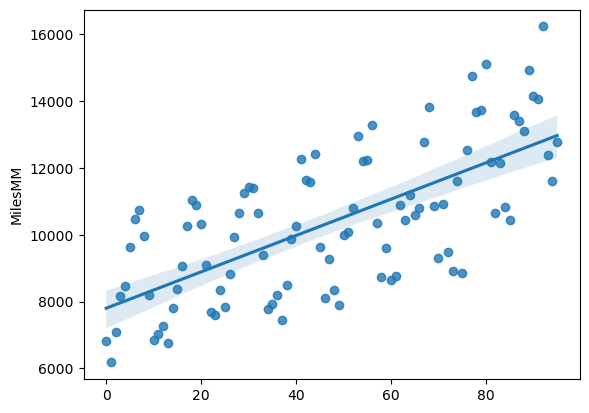

In [184]:
sns.regplot(x=df.index.values,y=df.MilesMM,data=df,order=1)

### Removing seasionality

In [185]:
df["year"]=df["Month"].dt.year

In [186]:
df

,Month,MilesMM,year
0,1963-01-01,6827,1963
1,1963-02-01,6178,1963
2,1963-03-01,7084,1963
3,1963-04-01,8162,1963
4,1963-05-01,8462,1963
...,...,...,...
91,1970-08-01,14057,1970
92,1970-09-01,16234,1970
93,1970-10-01,12389,1970
94,1970-11-01,11595,1970


In [187]:
df.groupby('year')["MilesMM"].mean()

year
1963     8300.250000
1964     8849.333333
1965     9619.250000
1966     9929.500000
1967    10542.916667
1968    10747.916667
1969    11972.000000
1970    13124.750000
Name: MilesMM, dtype: float64

<Axes: xlabel='year'>

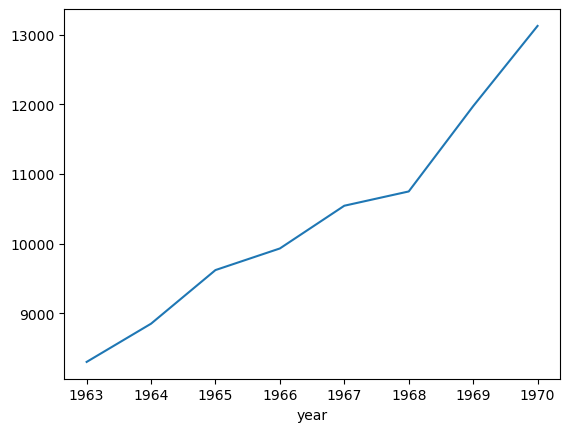

In [188]:
df.groupby('year')["MilesMM"].mean().plot()

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

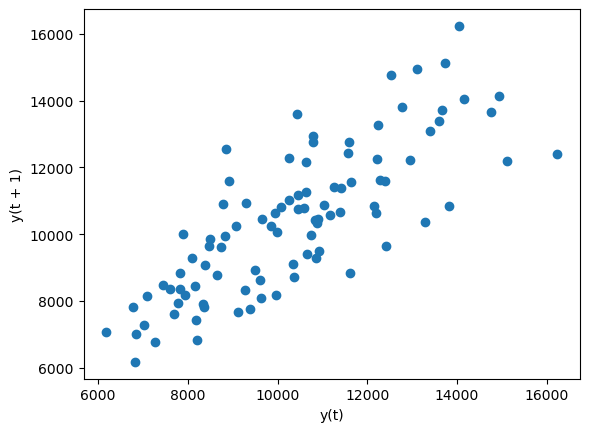

In [189]:
from pandas.plotting import lag_plot, autocorrelation_plot
lag_plot(df['MilesMM'])

In [190]:
df["lag"]=df["MilesMM"].shift(1)

<Axes: xlabel='lag', ylabel='MilesMM'>

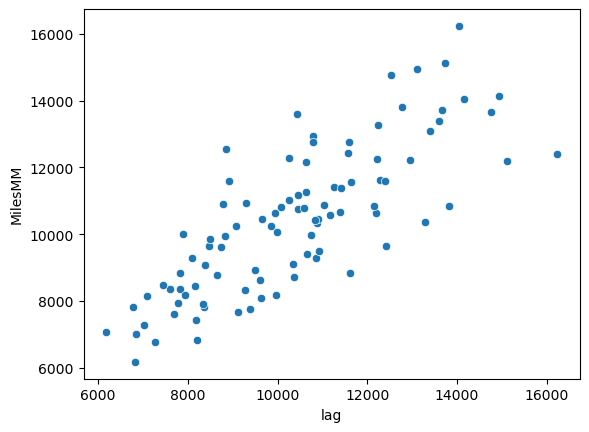

In [191]:
sns.scatterplot(x=df['lag'],y=df["MilesMM"])

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

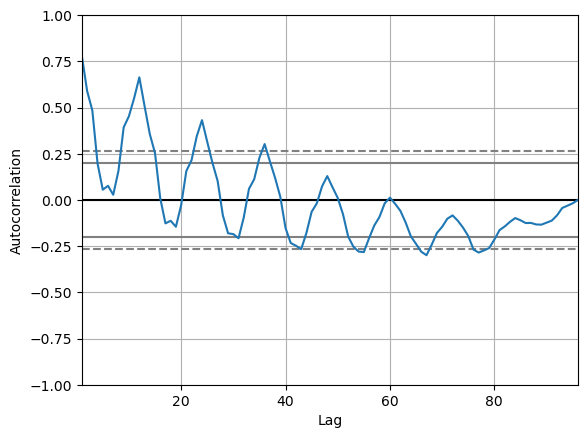

In [192]:
autocorrelation_plot(df["MilesMM"])

In [193]:
miles_df = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', header=0 , parse_dates=[0])

In [194]:
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [195]:
#Downsampling
quarterly_miles_df = miles_df.resample('Q', on='Month').mean()
quarterly_miles_df.head()

,MilesMM
Month,
1963-03-31,6696.333333
1963-06-30,8756.000000
1963-09-30,10392.333333
1963-12-31,7356.333333
1964-03-31,7287.666667


In [196]:
yearly_total_miles_df = miles_df.resample('A', on='Month').sum()

In [197]:
yearly_total_miles_df.head(8)

,MilesMM
Month,
1963-12-31,99603
1964-12-31,106192
1965-12-31,115431
1966-12-31,119154
1967-12-31,126515
1968-12-31,128975
1969-12-31,143664
1970-12-31,157497


In [198]:
#Upsampling
upsampled_miles_df = miles_df.resample('D', on='Month').mean()
upsampled_miles_df = miles_df.resample('D', on='Month').mean()
upsampled_miles_df.head(35)

,MilesMM
Month,
1963-01-01,6827.0
1963-01-02,NaN
1963-01-03,NaN
1963-01-04,NaN
1963-01-05,NaN
1963-01-06,NaN
1963-01-07,NaN
1963-01-08,NaN
1963-01-09,NaN


In [199]:
interpolated_miles_df = upsampled_miles_df.interpolate(method='linear')

In [200]:
interpolated_miles_df.head(32)

,MilesMM
Month,
1963-01-01,6827.000000
1963-01-02,6806.064516
1963-01-03,6785.129032
1963-01-04,6764.193548
1963-01-05,6743.258065
1963-01-06,6722.322581
1963-01-07,6701.387097
1963-01-08,6680.451613
1963-01-09,6659.516129


<Axes: xlabel='Month'>

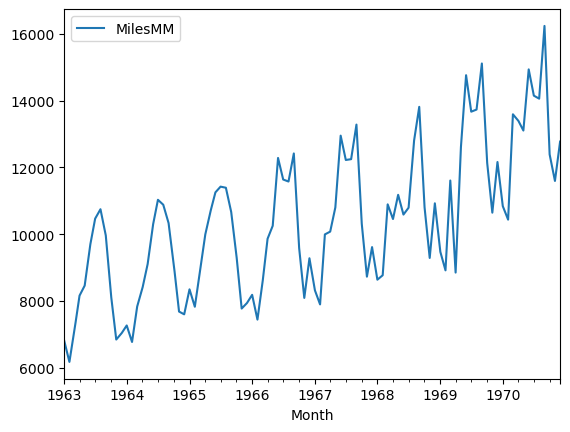

In [201]:
interpolated_miles_df.plot()